In [2]:
import numpy as np
import scipy as scipy

In [3]:
def initial_matrix(N: int, phi_1: float, phi_2: float, theta_1: float, theta_2: float):
    # the initial rectangle area on the spherical coordinte is pi * 2pi
    output = np.zeros((N, 2*N))
    # phi and theta should in pi * 2pi
    if(phi_1 > 2*np.pi or phi_2 > 2*np.pi or theta_1 > np.pi or theta_2 > np.pi):
        raise ValueError("out of bound")
        
    if(phi_1 > phi_2):
        raise ValueError("phi_1 should be smaller than phi_2") 
    if(theta_1 > theta_2):
        raise ValueError("theta_1 should be smaller than theta_2")  
        
    a_1 = int(N * theta_1 / np.pi)
    a_2 = int(N * theta_2 / np.pi)
    b_1 = int(N * phi_1 / (2 * np.pi))
    b_2 = int(N * phi_2 / (2 * np.pi))
    
    output[a_1:a_2, b_1:b_2] = 1
    
    return output

In [4]:
import pyshtools as pyshtools


In [5]:
agrid = initial_matrix(2000, 1, 2, 1, 2)

In [6]:
grid = pyshtools.SHGrid.from_array(agrid)

In [7]:
clm = grid.expand()

In [16]:
lmax = 1000
print(np.shape((grid.to_array())))
print(len(grid.to_array()[0]))

(2000, 4000)
4000


In [20]:
import math
from tqdm import tqdm
def get_num_of_boxes(value_matrix, box_length):
    height = len(value_matrix) - 2    
    width = len(value_matrix[0]) - 2
    total_number = 0
    for i in tqdm(range(height-2)):
        for j in (range(width-2)):
            max_number = max(value_matrix[i][j], value_matrix[i+1][j], value_matrix[i][j+1], value_matrix[i+1][j+1])
            min_number = min(value_matrix[i][j], value_matrix[i+1][j], value_matrix[i][j+1], value_matrix[i+1][j+1])
            diff = max_number - min_number
            temp = diff / box_length
            total_number += temp
    n = np.log(total_number)
    m = np.log(1/box_length)
    return n/m

In [21]:
N = 2000
box_dimension = get_num_of_boxes(grid.to_array(), np.pi / N)
print(box_dimension)

100%|███████████████████████████████████████| 1996/1996 [00:24<00:00, 80.41it/s]

2.1701760500989162


In [7]:
# grid_reco = clm.expand(lmax=lmax)

In [8]:
from pyshtools.shtools import SHExpandDH, MakeGridDH

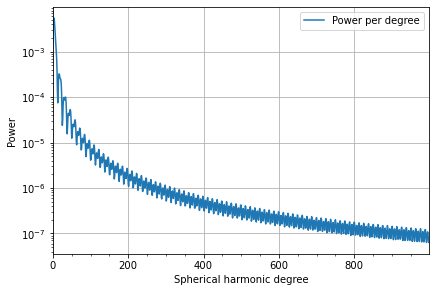

In [9]:
fig, ax = clm.plot_spectrum(show=False) 

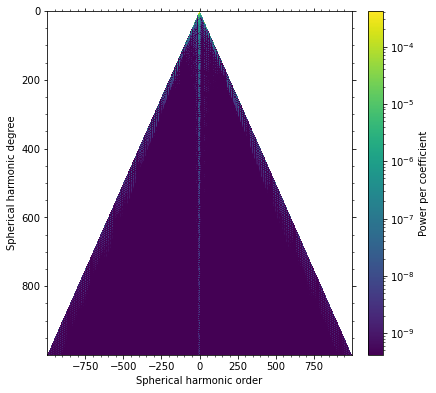

In [10]:
fig, ax = clm.plot_spectrum2d(cmap_rlimits=(1.e-7, 0.1),
                              show=False)

In [26]:
coeffs = clm.to_array()

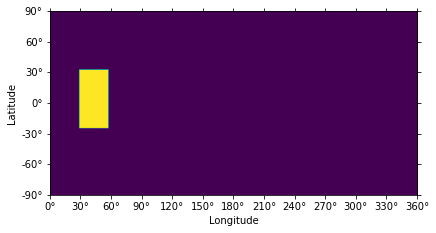

In [27]:
fig, ax = grid.plot(show=False)

In [28]:
# fig, ax = grid.plot3d(elevation=60,
#                       azimuth=90,
#                       scale=2,
#                       cmap_limits=[-1.5, 1.5],
#                       show=False)

In [29]:
## Change a t value

In [30]:
def change_t(odd_coeffs: np.ndarray, t: int) -> np.ndarray:
    new_coeffs = odd_coeffs
    row = len(odd_coeffs[0])
    column = len(odd_coeffs[0][0])
    for k in range(0, 2):
        for i in range(row):
            for j in range(column):
                new_coeffs[k][i][j] = odd_coeffs[k][i][j] * np.cos(t * i * (i+1))
    return new_coeffs

In [31]:
## t = pi / 10

In [32]:
new_coeffs_1 = change_t(coeffs, np.pi / 10)

In [33]:
## new SHCoeffs class from the new matrix 

In [34]:
new_SHCoeffs_class_1 = pyshtools.SHCoeffs.from_array(new_coeffs_1)

In [35]:
## Visualization of the Fourier coefficients

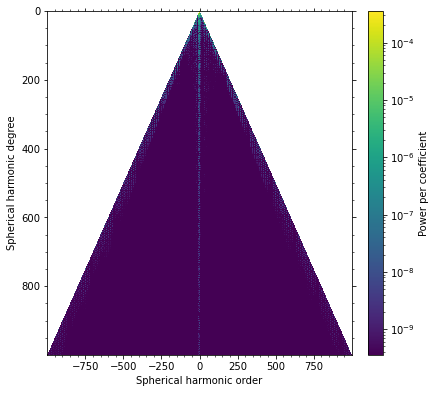

In [39]:
fig, ax = new_SHCoeffs_class_1.plot_spectrum2d(cmap_rlimits=(1.e-7, 0.1),
                              show=False)

In [40]:
## new SHgrid class from the new SHCoeffs class 

In [41]:
new_grid_1 = new_SHCoeffs_class_1.expand()

In [24]:
## Visualizations of the function

In [25]:
# fig, ax = new_grid_1.plot3d(elevation=60,
#                       azimuth=90,
#                       scale=2,
#                       cmap_limits=[-1.5, 1.5],
#                       show=False)

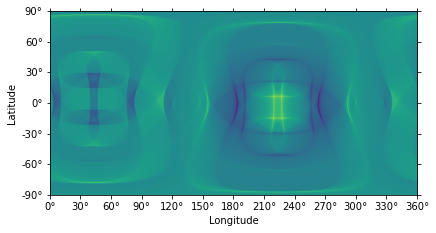

In [26]:
fig, ax = new_grid_1.plot(show=False)

In [43]:
## t = pi**2 / 10000

In [44]:
new_coeffs_2= change_t(coeffs, np.pi**2 / 100)

In [45]:
new_SHCoeffs_class_2 = pyshtools.SHCoeffs.from_array(new_coeffs_2)

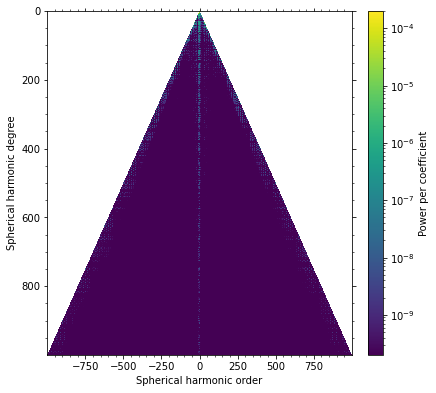

In [46]:
new_grid_2 = new_SHCoeffs_class_2.expand()
fig, ax = new_SHCoeffs_class_2.plot_spectrum2d(cmap_rlimits=(1.e-7, 0.1),
                              show=False)

In [49]:
print(np.shape((new_grid_1.to_array())))
print(len(new_grid_1.to_array()[0]))
N = 2000
box_dimension = get_num_of_boxes(new_grid_1.to_array(), np.pi / N)
print(box_dimension)

(2001, 4001)
4001


100%|███████████████████████████████████████| 1997/1997 [00:26<00:00, 74.58it/s]

2.574834052595037


In [31]:
# fig_1, ax_1 = new_grid_2.plot3d(elevation=60,
#                       azimuth=90,
#                       scale=2,
#                       cmap_limits=[-1.5, 1.5],
#                       show=False)

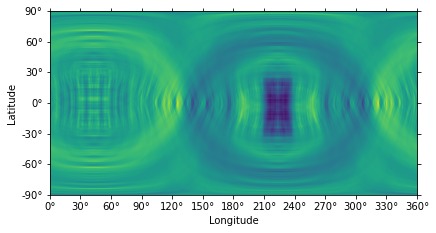

In [32]:
fig_1, ax_1 = new_grid_2.plot(show=False)

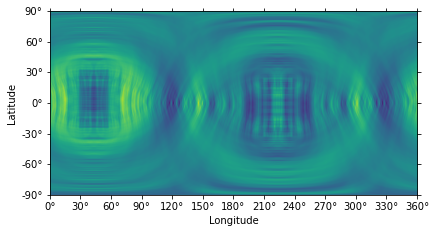

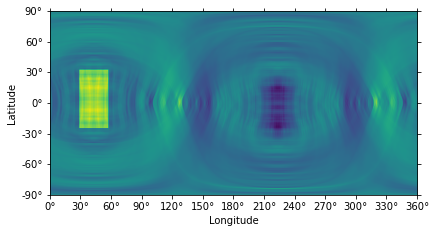

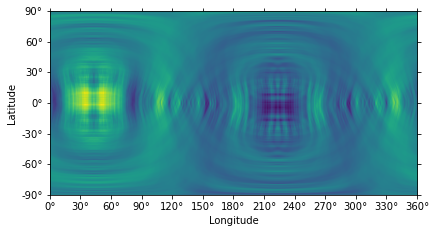

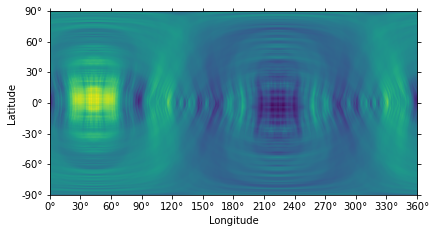

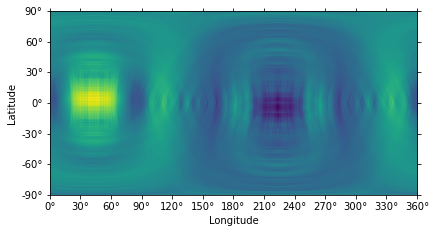

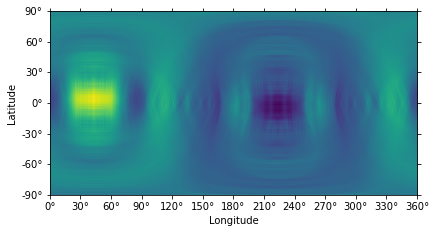

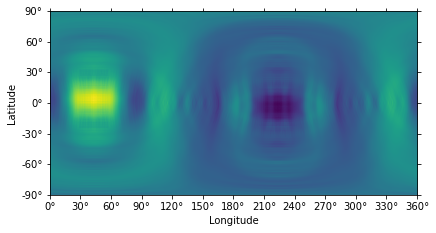

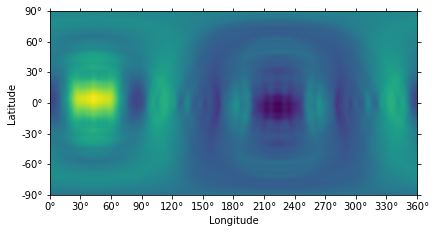

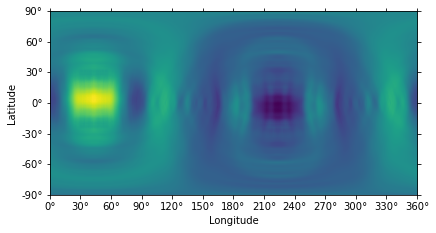

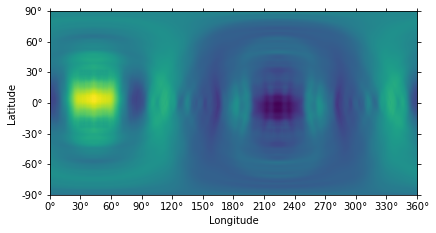

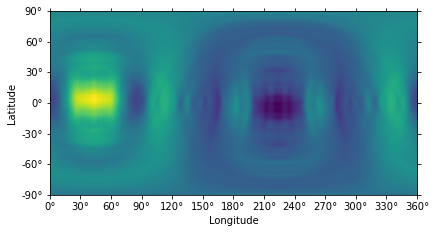

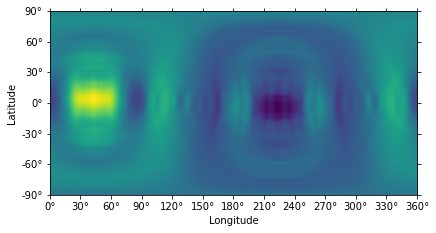

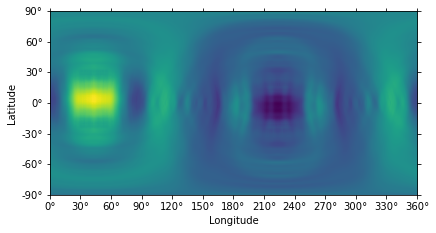

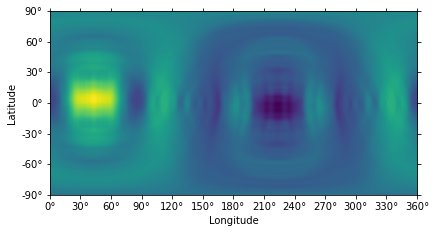

In [33]:
for i in range(1, 15):
    new_coeffs_i = change_t(coeffs, np.pi**i / (10**i))
    new_SHCoeffs_class_i = pyshtools.SHCoeffs.from_array(new_coeffs_i)
    new_grid_i = new_SHCoeffs_class_i.expand()
    fig, ax = new_grid_i.plot(show=False)
#     fig, ax = new_grid_i.plot3d(elevation=60,
#                       azimuth=90,
#                       scale=2,
#                       cmap_limits=[-1.5, 1.5],
#                       show=False)

In [35]:
print(np.shape(coeffs))


(2, 1000, 1000)


In [1]:
lmax = 1000